# Introduction

What is Statistical Inference?

Statistical inference is the process of extracting information of an unknown variable or an unknown model from available data. 
There are two main types, Bayesian and Classical.  

Inference problems are normally categorized into Parameter Estimation, Hypothesis testing, and Significance Testing. The methodologies discussed in the textbook are Maximum a posteriori probability rule, least mean squares estimation, maximum likelihood, regression, and likelihood ratio tests.

### Probability vs. Statistics

Recall probability is defined by axioms, so we must assume a probabilistic model follows the axioms.  We can then use methods to extract information, and have a set, unique correct answer.  This differs from Statistics, since in Stats, there are many different methods to extract different answers, and there is no best method.  Choosing a method is described as an art, and considerations depend on factors such as performance guarantees, past experience, "common sense," and the consensus of the statistics community. 

### Bayesian Statistics vs. Classical Statistics

__Bayesian:__
- Models are treated as random variables with known distributions.
- Fits statistical methods into probability theory axioms, so each question has unique answer
    - How is this done?

A bayesian model introduces a random variable $\Theta$, that represents the model, and postulates a __prior__ probability distribution $p_\Theta(\theta)$. The following model, the __posterior__ probability distribution captures all the information that $x$ can provide about $\theta$

$p_{\theta|x}(\theta|x)$

__Classical:__
- Models are treated as deterministic quantities, which happen to be unknown.
 - specifically, $\theta$ in this case is seen as a constant unknown quantity, then is estimated with some performance guarantees
- So, $\theta$ could be any probabilistic model
    

__So who is the winner?__

Neither. It is a heavily debated topic, but each clearly are powerful schools.

The debate in the textbook is presented as such:

Consider trying to determine the mass of the electron, through noisy experiments.  Classical statisticians argue that it is a constant, and is unreasonable to model it as a random variable.  Bayesian statisticians will counter that a prior distribution would reflect our state of knowledge, as in, if we know from past experiments that there is a reasonable range for the mass of an electron, we can express this by postulating a prior distribution which is concentrated within that range.

Classical statisticians will argue that it is arbitrary when picking a prior distribution, however, each classical statistical procedure will contain some hidden choices.  Bayesian statisticians would argue that since this is more clearly defined, they make the choice available for debate.

Bayesian methods can have difficulty when computing, such as the evaluation of multi-dimensional integrals, that are now possible and accessible due to advances in computing power.

### Model Inference vs. Variable Inference

__Model Inference:__ The object of study is a real process where we want to validate a model based on available data
- Ex: do planets follow elliptical Trajectories?

__Variable Inference:__ What is the value of an unknown variable in our data?
- Ex: What is my position, given a few GPS readings?

In some cases, we can build a model and use it to figure out variables, or find out variables to build a model.  Each type of inference can be used to construct the other information.  

### Rough Classification of Statistical Inference Problems

__Estimation:__ A model is fully specified, except for an unknown parameter $\theta$ which we want to estimate.  It could be either a random variable or an unknown constant. The overarching goal: estimate $\theta$ that is close to the true value.

Examples:

- Using polling data, estimate the fraction of the voter population that prefers candidate A over candidate B.

- Given historical stock market data, estimate the mean and variance of the daily movement in the price of a particular stock

__Binary hypothesis testing:__ We start with two hypotheses, and use available data to decide which of the two is true.

Examples:
- Given a noisy picture, decide if there is a person in the picture or not.
- Given a set of trials with two alternative medical treatments, decide which treatment is most effective.

There is also *m*__-ary hypothesis testing__ problems, where there are _m_ competing hypotheses.  

In estimation and hypothesis testing, bayesian or classical methods can be used

This chapter will cover mainly Bayesian estimation, and a bit of hypothesis testing.  Next chapter will discuss broader ranges of these problems.  

__Major Terms, Problems, and Methods in this Chapter__
- __Bayesian statistics__ treats unknown parameters as random variables with known prior distributions
- In __parameter estimation__, we want to generate estimates that are close to the true values of the parameters in some probabilistic sense
- In __hypothesis testing__, the unknown parameter takes one of a finite number of values, corresponding to competing hypothesis; we want to choose one of the hypotheses, aiming to acheive a small probability of error.
- Principle Bayesian inference methods:
 - __Maximum a posteriori probability__ (MAP) rule: Out of the possible parameter values/hypotheses, select one with the maximum conditional/posterior probability given the data (section 8.2)
 - __Least mean squares__ (LMS) estimation: Select an estimator/function of the data that minimizes the mean squared error between the parameter and its estimate (section 8.3)
 - __Linear LMS__ estimation: Select an estimator that is a linear function of the data and minimizes the mean squared error between the parameter and its estimate (section 8.4). This may result in larger LMS, but requires simple calculations, based only on the means, variances, and covariances of the random variables involved.

# 8.1 Bayesian Inference and the Posterior Distribution

To conduct bayesian inference, we take our unknown quantity, $\Theta$ as a random variable, or a finite collection of random variables.  Our goal is to take $X$, which is a collection of known related random variables $(X_1, ..., X_n)$ which we call __Observations, Measurements,__ or an __Observation vector__.  We then assume that we know the joint distribution of $\Theta$ and $X$.  This translates to the following:
- A Prior distribution $p_\Theta$ or $f_\Theta$, depending on whether $\Theta$ is discrete or continuous
- A Conditional distribution $p_{X|\Theta}$ or $f_{X|\Theta}$, depending on whether $X$ is discrete or continuous

Once a value $x$ of $X$ has been observed, _a complete answer to the Bayesian inference problem is provided by the posterior distribution $p_{\Theta|X}(\theta|x)$ or $f_{\Theta|X}(\theta|x)$ of $\Theta$_. It is determined by Bayes' rule, and tells everything there is to know about $\Theta$, given the available information. 

![title](figures/fig_8_1.jpg)

__Summary of Bayesian Inference__
- We start with prior distribution $p_\Theta$ or $f_\Theta$ for the unknown random variable $\Theta$
- We have a model $p_{X|\Theta}$ or $f_{X|\Theta}$ of the observation vector $X$.
- After observing $x$ of $X$, we form the posterior distribution of $\Theta$, using Bayes' rule

__Bayes' Rule versions__

$\Theta$ discrete, $X$ discrete: $p_{\Theta|X}(\theta|x)$ = $\frac{p_\Theta(\theta)p_{X|\Theta}(x|\theta)}{\sum_{\theta '} p_\Theta(\theta')p_{X|\Theta}(x|\theta')}$

$\Theta$ discrete, $X$ continuous: $p_{\Theta|X}(\theta|x)$ = $\frac{p_\Theta(\theta)f_{X|\Theta}(x|\theta)}{\sum_{\theta '} p_\Theta(\theta')f_{X|\Theta}(x|\theta')}$

$\Theta$ continuous, $X$ discrete: $f_{\Theta|X}(\theta|x)$ = $\frac{f_\Theta(\theta)p_{X|\Theta}(x|\theta)}{\int f_\Theta(\theta')p_{X|\Theta}(x|\theta')d\theta'}$

$\Theta$ continuous, $X$ continuous: $f_{\Theta|X}(\theta|x)$ = $\frac{f_\Theta(\theta)f_{X|\Theta}(x|\theta)}{\int f_\Theta(\theta')f_{X|\Theta}(x|\theta')d\theta'}$


__Another Summary__

We have unknown $\theta$, which is a value of the random variable $\Theta$.  We assume the prior distribution of $\Theta$, $p_\Theta$ to be something reasonable, like a uniform distribution (this is the "out and in the open for debate" referenced in the introduction).  Then, we set up a conditional PDF, $p_{X|\Theta}$, that represents the model of our observations, "if our prior is true, I'm going to see $X$ like this. Now I can run an experiment, and take my observation vector, and use Bayes' rule to find a posterior PDF that I can use to predict $\theta$.

### 8.1 Example

Romeo and Juliet start dating, but Juliet will be late on any date by a random amount $X$, uniformly distributed over the interval $[0, \theta]$.  The parameter $\theta$ is unknown and is modeled as the value of a random variable $\Theta$, uniformly distributed between zero and one hour.  Assuming that Juliet was late by an amount $x$ on their first date, how should Romeo use this information to update the distribution of $\Theta$? 

_One confusion that I had for a long time of the duration of the problem: the parameter $\theta$ is the maximum value of the uniform distribution that Juliet would be bound to_

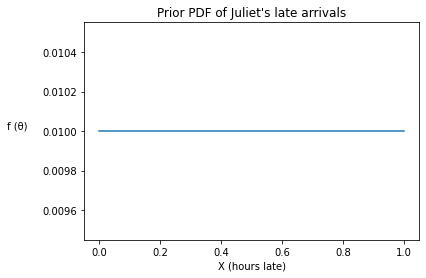

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x := np.linspace(0, 1, 100), [1/100] * 100) # 100 is an arbitrary number, and is for the purpose of plotting
plt.ylabel("f (\u03B8)", rotation=0, labelpad=25)
plt.xlabel("X (hours late)")
plt.title("Prior PDF of Juliet's late arrivals")
plt.show()

$f_\Theta(\theta) =  \begin{cases} 
        1  & \text{if } 0 \leq \theta \leq 1 \\
        0, & \text{otherwise.} 
      \end{cases}$

$f_{X|\Theta}(x|\theta) =  \begin{cases} 
        1 / \theta & \text{if } 0 \leq x \leq \theta \\
        0, & \text{otherwise.} 
      \end{cases}$

So, we have our assumption of the distribution, $f_\Theta$, and we know that a sample of $X$ should look like $f_{X|\Theta}$, our conditional PDF of the observation.  Our prior assumption is essentially saying that it is equally likely that Juliet will be late for any time between 0 and 1 hours.

One observation that is important, is that $f_\Theta \cdot f_{X|\Theta}$ is nonzero if and only if $0 \leq x \leq \theta \leq 1$

With all of this, we can compute the posterior, our predictive distribution, using bayes' rule.

$f_{\Theta|X} = \begin{cases} 
        \frac{1}{\theta \cdot |\ln x|} & \text{if } x \leq \theta \leq 1 \\
        0 & \text{otherwise}
        \end{cases}$

Let's try to test how this works!

Note that according to our prior, Juliet's expectation ($E[X]$) is 0.5.

Let's say that Juliet shows up 0.25 hours late (15 minutes) on the first date.

$x = 0.25 \implies f_{\Theta|X} = \begin{cases} 
        \frac{1}{\theta \cdot |\ln 0.25|} & \text{if } x \leq \theta \leq 1 \\
        0 & \text{otherwise}
        \end{cases}$ 

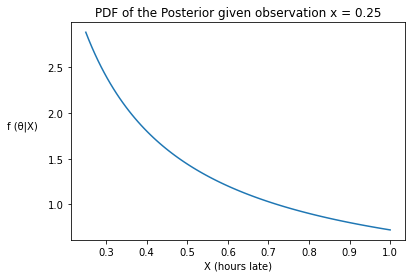

In [2]:
import math


observation = 0.25
pdf = lambda x : 1 / (x * abs(math.log(observation)))
plt.plot(x := np.linspace(observation, 1, 100), pdf(x))
plt.title(f"PDF of the Posterior given observation x = {observation}")
plt.ylabel("f (\u03B8|X)", rotation=0, labelpad=25)
plt.xlabel("X (hours late)")
plt.show()

So, in my understanding, we can now ask questions like "What is the probability, given that Juliet has been late on the first date by 0.25 hours, that Juliet's maximum late time is 0.6 hours?"

(CDF of posterior) $F_{\Theta|X} = 
\begin{cases}
    0 & \text{if } t \leq 0.25 \\
    \int_{0.25}^t \frac{1}{t \cdot \ln 0.25} & \text{if } t \leq 1 \\
    1 & \text{otherwise.}
\end{cases}$

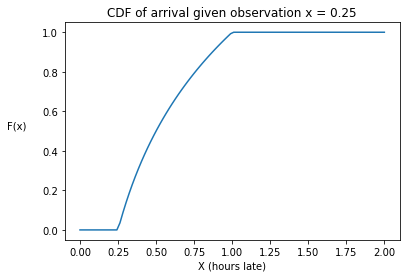

In [3]:
def cdf(t):
    if t < observation:
        return 0.0
    if t > 1:
        return 1.0
    else:
        return -math.log(abs(t))/math.log(observation) + 1    
    
plt.plot(x := np.linspace(0, 2, 100), [cdf(x_i) for x_i in x])
plt.title(f'CDF of arrival given observation x = {observation}')
plt.ylabel("F(x)", rotation=0, labelpad=25)
plt.xlabel("X (hours late)")
plt.show()

So, with this model, we can observe that the probability that Juliet's maximum late time being less than 0.6 hours late, given they were 0.25 hours late the first time, $F(0.6) = 0.63$,

Whereas: if Juliet arrived 0.01 hours late on the first date, $F(0.6) = 0.89$

To expand on this, the textbook goes into an example of the first $n$ dates.  

Assume Juliet is late by random amounts $X_1, ..., X_n$, which given $\Theta = \theta$, are uniformly distributed in the interval $[0, \theta]$, and conditionally independent. Let $X = (X_1, ..., X_n)$ and $x = (x_1, ..., x_n)$. similar to the case where n = 1, we have

$f_{X|\Theta}(x|\theta) = 
\begin{cases}
    1/\theta^n & \text{if } \bar{x} \leq \theta \leq 1 \\
    0 & \text{otherwise.}
\end{cases}$

where

$\bar{x} = \text{max}\{x_1, ..., x_n\}$

The posterior PDF is then:

$f_{\Theta|X} =
\begin{cases}
    \frac{c(\bar{x})}{\theta^n} & \text{if } \bar{x} \leq \theta \leq 1 \\
    0 & \text{otherwise}
\end{cases}$

where $c(\bar{x})$ is a normalizing constant that depends only on $\bar{x}$:

$c(\bar{x}) = \frac{1}{\int_\bar{x}^1\frac{1}{(\theta')^n}d\theta'}$

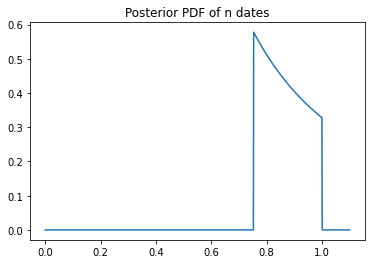

In [4]:
n = 2
X = np.random.rand(n)

def c_x(x_bar, _n):
    return (1 - x_bar**(1-_n))/(1-_n)

x_bar = np.max(X)
c_const = c_x(x_bar, n)

def posterior_n_pdf(x):
    if x < x_bar or x > 1:
        return 0
    else:
        return c_const / (x**n)

plt.plot(x := np.linspace(0, 1.1, 1000), [posterior_n_pdf(x_i) for x_i in x])
plt.title("Posterior PDF of n dates")
plt.show()

So given this, we can now answer the same questions while making multiple observations.  The method, to repeat yet again, is to have an unknown, $\theta$, and assume it is modeled by a random variable, $\Theta$, then construct a prior, and a conditional PDF given the Prior.  Then use Bayes' rule to get a posterior PDF.

I'm going to do my best to find some practice problems using Bayesian Inference, and create links and solutions.